In [1]:
#import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
injection_site = pd.read_csv("./virus_inj_sites.csv", index_col = 0)

injection_site

,x(pixel),y(pixel),z(pixel),z_loc,Genotype,x(micrometer),y(micrometer),z(micrometer)
010121 Tbr1 wt 1 nost,5239.00,3229.0,53.0,681.0,WT,9220.64,5683.04,6810.0
030121 Tbr1 wt 0 nost,5127.75,3213.0,43.0,741.0,WT,9024.84,5654.88,7410.0
030520 Tbr1 14 no st,5123.00,3352.0,48.0,695.0,WT,9016.48,5899.52,6950.0
041821 Tbr1 wt 20 nost,5164.00,3480.0,49.0,691.0,WT,9088.64,6124.80,6910.0
053020 Tbr1 25 nost,5201.00,3380.0,52.0,651.0,WT,9153.76,5948.80,6510.0
123121_Tbr1_wt_0_nost,5056.00,3401.0,59.0,664.0,WT,8898.56,5985.76,6640.0
010121 Tbr1 wt 2 TBS,5339.00,3173.0,50.0,702.0,WT,9396.64,5584.48,7020.0
022121 Tbr1 wt 4 TBS,5109.50,3211.0,38.0,742.0,WT,8992.72,5651.36,7420.0
022121_Tbr1_wt_7_TBS,5334.00,3220.0,40.0,747.0,WT,9387.84,5667.20,7470.0
030520 Tbr1 12 TBS,5169.00,3133.0,46.0,702.0,WT,9097.44,5514.08,7020.0


/var/folders/9g/yfj8jhwn08g75ksrqw3p_68c0000gn/T/ipykernel_7925/252987657.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection = "3d")


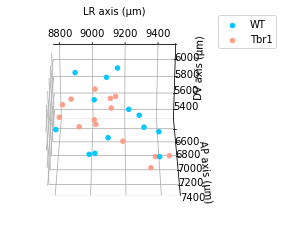

In [3]:
#static 3D scatter plot of BLA virus injection site
#S2B Fig

WT_inj = injection_site[injection_site["Genotype"]=="WT"]
Tbr1_inj = injection_site[injection_site["Genotype"]=="Tbr1"]
fig = plt.figure(figsize = (4, 4))
ax = fig.gca (projection = "3d")
ax.set_box_aspect(((6480*1.76)/(1320*10), (4547*1.76)/(1320*10), 1))
ax.scatter (WT_inj["x(micrometer)"],
            WT_inj["y(micrometer)"],
            WT_inj["z(micrometer)"],
            c = "#00C8FF",
            label = "WT",
            alpha=1)
ax.scatter (Tbr1_inj["x(micrometer)"],
            Tbr1_inj["y(micrometer)"],
            Tbr1_inj["z(micrometer)"],
            c = "#FF9E8B",
            label = "Tbr1",
            alpha=1)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_xlabel ("LR axis (\u03BCm)")
ax.set_ylabel ("DV axis (\u03BCm)")
ax.set_zlabel ("AP axis (\u03BCm)")
ax.grid(True)
ax.view_init(120, -90)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:], labels[:], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()

1 0.4833333333333333
2 0.5166666666666666
3 0.4666666666666666
4 0.5166666666666666
5 0.45
6 0.4833333333333333
7 0.41666666666666663
8 0.5333333333333333
9 0.3
10 0.3833333333333333
11 0.3333333333333333
12 0.4333333333333333
13 0.4


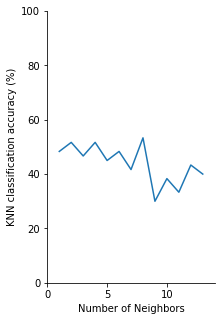

In [4]:
#KNN neighbors number
#S2C Fig
#reference: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

import warnings
warnings.filterwarnings('ignore')

injection_site_ml = injection_site[["x(micrometer)", "y(micrometer)", "z(micrometer)", "Genotype"]]
injection_site_ml

y = injection_site_ml["Genotype"].values
X = injection_site_ml.drop("Genotype", axis = 1).values

neighbors = np.arange (1,14)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate (neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    cv_results = cross_validate (knn, X, y, cv = 10)
    test_accuracy[i] = np.mean(cv_results["test_score"])
    print(k, test_accuracy[i])
    
fig, ax = plt.subplots (figsize = (3,5))
ax.plot (neighbors, test_accuracy*100)
ax.set_ylim([0, 100])
ax.set_xlim([0,14])
#ax.set_xticklabels (np.arange (13)+1)
plt.xlabel ("Number of Neighbors")
plt.ylabel ("KNN classification accuracy (%)")
sns.despine()

plt.show()

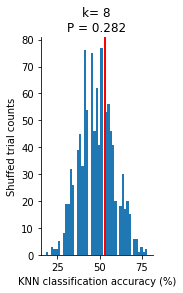

In [5]:
#classification accuracy distributions of virus injection locations shuffled 1000 times
#S2D right panel

import warnings
warnings.filterwarnings('ignore')

injection_site_ml = injection_site[["x(micrometer)", "y(micrometer)", "z(micrometer)", "Genotype"]]
injection_site_ml

y = injection_site_ml["Genotype"].values
X = injection_site_ml.drop("Genotype", axis = 1).values

knn = KNeighborsClassifier(n_neighbors= 8)
cv_results = cross_validate (knn, X, y, cv = 10)
exp_score = np.mean(cv_results["test_score"])

np.random.seed(17)
perm_knn_score = np.empty (1000)
for i in range (1000):
    perm_y = np.random.permutation(y)
    knn_perm = KNeighborsClassifier(n_neighbors= 8)
    cv_perm_results = cross_validate (knn_perm, X, perm_y, cv = 10)
    perm_knn_score[i] = np.mean(cv_perm_results["test_score"])

P = len([a for a in perm_knn_score if a>exp_score])/len(perm_knn_score)

plt.figure (figsize = (2,4))
plt.hist (perm_knn_score*100, bins = len (np.unique(perm_knn_score)))
plt.axvline(x=exp_score*100, color="red", linewidth=2)
plt.xlabel ("KNN classification accuracy (%)")
plt.ylabel ("Shuffed trial counts")
plt.title ("k= {}\nP = {}".format (8, P))
sns.despine()

plt.show()